# En este notebook se hace un primer análisis de random forest para 50 árboles de decisión con la representación vectorial word2vec con 100 dimensiones

In [ ]:
# To visualize plots in the notebook
%matplotlib inline

import numpy as np
import pandas as pd # To read data tables from csv files
import seaborn as sns # To plot statistical graphics
import matplotlib.pyplot as plt # To plot the figures
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

import os
from termcolor import colored
import tqdm
import scipy
import gc
import joblib

# For plots and graphical results
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab

# That's default image size for this interactive session
pylab.rcParams['figure.figsize'] = 6, 4

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Cargar los datos desde el archivo JSON
#data_path = '/content/drive/My Drive/proyecto/full_format_recipes.json'  # Clara
data_path = '/content/drive/My Drive/Colab Notebooks/proyecto/full_format_recipes.json'  # Jorge
recipes_df = pd.read_json(data_path)

#en TF-IDF ya teníamos alta dimensionalidad, en w2v los datos datos tienen una dimensionalidad de 100, el texto de la receta no es tan largo ni complejo
#como para que con dimensionalidad 100 no sea posible cargar los datos.

# Cargar los embeddings desde el archivo guardado
w2v_directions = np.load('/content/drive/My Drive/Colab Notebooks/proyecto/w2v_embeddings.npy')

# Verifica el tamaño de los embeddings cargados
print(f"Tamaño de los embeddings: {w2v_directions.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Tamaño de los embeddings: (20130, 100)


### **1. Preparación de los datos de entrenamiento y de test**

In [ ]:
from re import X
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

target = recipes_df['rating']
print(min(target)) #0
print(max(target)) #5
target = target.fillna(target.mean()) # Relleno los valores que faltan (NaN) con media

X_train, X_test, y_train, y_test = train_test_split(w2v_directions, target, test_size=0.2, random_state=42)

0.0
5.0


### **2. Entrenamiento y evaluación**

#### ***2.1 Modelo de regresión con técnica de librería Scikit Learn***

##### *2.1.3 Random Forest*

In [ ]:
#para random forest no hay que normalizar los datos

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Dividimos los datos (ya tienes X_train y X_test)
model = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1)

# Entrenamos el modelo directamente con Word2Vec
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Resultados con Word2Vec sin selección de características:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

Resultados con Word2Vec sin selección de características:
Mean Squared Error (MSE): 1.4443
R^2 Score: 0.1996


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error'
)
mse_cv = -np.mean(scores)
print(f"MSE con validación cruzada: {mse_cv:.4f}")

MSE con validación cruzada: 1.4465


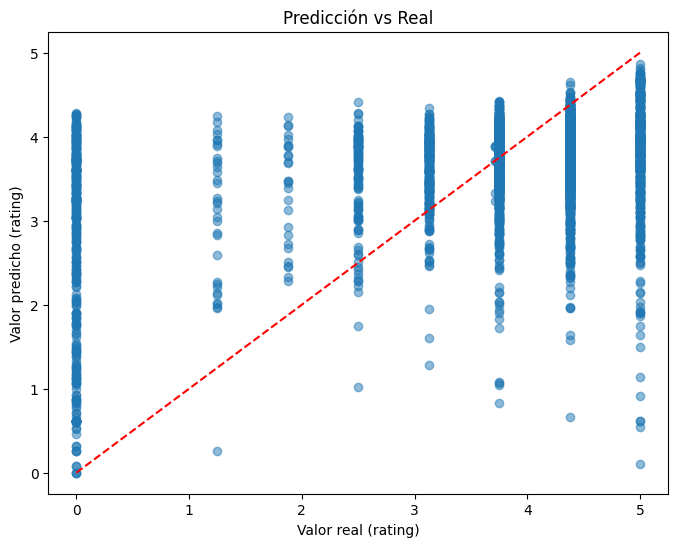

In [ ]:
#comparación valores reales vs valores predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([0, 5], [0, 5], '--', color='red')  # Línea de referencia
plt.xlabel("Valor real (rating)")
plt.ylabel("Valor predicho (rating)")
plt.title("Predicción vs Real")
plt.show()

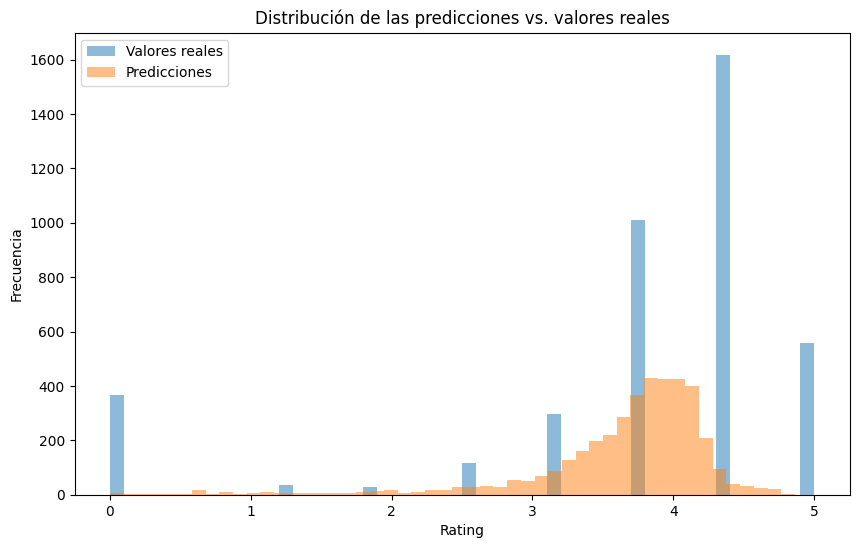

In [ ]:
#distribución valores reales rating vs predicciones
# Comparar distribuciones de las predicciones y los valores reales
plt.figure(figsize=(10, 6))
plt.hist(y_test, bins=50, alpha=0.5, label="Valores reales")
plt.hist(y_pred, bins=50, alpha=0.5, label="Predicciones")
plt.title("Distribución de las predicciones vs. valores reales")
plt.xlabel("Rating")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()